# Training and Tuning

In [ ]:
%%bash
pip install -qU pip wheel
pip install -qU numpy pandas matplotlib seaborn scikit-learn
pip check

## Detect Overfit and Underfit with Learning Curves

In [ ]:
%%writefile data.csv
x1,x2,y
0.336493583877,-0.985950993354,-1.0
-0.0110425297266,-0.10552856162,1.0
0.238159509297,-0.61741666482,1.0
-0.366782883496,-0.713818716912,1.0
1.22192307438,-1.03939898614,-1.0
-1.30456799971,0.59261847015,-1.0
-0.407809098981,-0.509110509763,1.0
0.893188941965,1.18285985648,-1.0
-0.00546337259365,-0.589551228864,1.0
0.406423768278,0.611062234636,1.0
-0.145506766722,0.0365463997206,1.0
-0.0404887876421,-0.0566500319512,1.0
1.60355997627,0.0908139379574,-1.0
-0.604838450284,-0.111340204903,1.0
-0.534401237223,-1.04875779188,-1.0
0.977706756346,-1.35281793296,-1.0
-0.422036924523,-0.274418973593,1.0
1.69051344717,-0.929766839195,-1.0
0.655534595433,-0.244533046405,1.0
0.384609916121,-0.334328465856,1.0
-0.109341027267,0.273694976361,1.0
-1.28710021847,-0.406756443289,-1.0
0.435217566287,-0.192221316649,1.0
0.0555208008113,1.024011876,-1.0
1.5088217057,-0.799489053235,-1.0
0.75932306599,0.775189603256,-1.0
0.967078497167,-0.707726241999,-1.0
-0.0231301769156,1.34060202328,-1.0
-0.274591142835,-0.549682228079,1.0
-1.2080749077,-1.41385342554,-1.0
0.381259079564,-0.852947496234,1.0
0.404870623291,-0.38564643089,1.0
0.0173135930664,0.787433467901,1.0
-0.650474497449,0.377281547969,1.0
-0.175095703948,0.557524657143,1.0
0.090747012995,0.146764389396,1.0
-0.23406335446,-1.14282728744,-1.0
-0.023240502157,0.0329251073349,1.0
-0.98177853269,-0.614024199162,-1.0
0.863118366276,0.626452589641,-1.0
-0.494201528321,-1.2458627184,-1.0
0.560657440533,0.960463847964,-1.0
0.517532460272,-1.015620433,-1.0
-1.07674778462,1.64110648889,-1.0
-0.40295146753,1.74395283754,-1.0
1.26250128528,-0.0880456579187,-1.0
-1.13554604657,0.691274079866,-1.0
-1.88154070755,0.579520022541,-1.0
1.61949373896,-1.16815366758,-1.0
-0.167382068846,0.318140979545,1.0
-0.731515970032,-0.626052631824,1.0
0.14962052078,1.24000574432,-1.0
1.16720084422,0.521580749715,-1.0
-0.436063303539,0.043680311306,1.0
-0.827638902506,0.275166403707,1.0
1.36953107467,0.971233523422,-1.0
0.690612759144,-1.27804624607,-1.0
1.26986688391,0.575808793135,-1.0
0.208866020688,-0.146742455013,1.0
-0.437203222578,0.52116507147,1.0
-0.378363762158,-0.0769780148552,1.0
-0.423820115256,-0.836137209863,1.0
-0.560756181289,-0.41037775405,1.0
0.336052960763,-0.224802048045,1.0
-1.33543072512,-0.990358481473,-1.0
-0.0289733996866,0.441010128386,1.0
-1.3193906415,-0.37764709941,-1.0
-0.808411080806,1.2283790386,-1.0
1.35995943884,1.12161870845,-1.0
-0.872069364163,-0.252522725967,1.0
-1.88887517471,0.144098536459,-1.0
1.60845822722,-0.774759253864,-1.0
-0.358639909549,0.784305199745,1.0
0.520332593218,-0.62185400704,1.0
0.306204273961,0.25448089669,1.0
-1.51072939376,0.00594704976351,-1.0
0.956067338203,-0.533023015577,-1.0
0.288866739458,-0.725155662248,1.0
0.403468553933,-1.75945770781,-1.0
0.0859415686163,-0.958846823471,1.0
0.381957047469,0.0124143718471,1.0
0.336004016976,-0.259620737798,1.0
1.02869639688,-0.785051442286,-1.0
-0.181058441906,0.00266871780379,1.0
0.279139768315,0.148068778283,1.0
-0.700587484192,0.118422440942,1.0
-0.474343136475,-0.162548759675,1.0
-1.29581526521,0.755926314388,-1.0
0.140673267698,-1.60264376179,-1.0
0.328196143279,0.444738575921,1.0
-0.940761503292,-1.00437673463,-1.0
0.4177654822,1.11423358886,-1.0
-0.802874871784,-1.27790346857,-1.0
-0.596842011584,0.593623894204,1.0
-0.112331263254,0.174318514314,1.0
-1.45753325136,-1.30679050369,-1.0
1.63561447039,0.27394296313,-1.0
0.113120402388,0.0204651461722,1.0
0.753405102224,0.1938301221,1.0
-0.538129041247,-0.000723035827331,1.0

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font='DejaVu Sans')
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation, :]
    Y2 = Y[permutation]
    return X2, Y2

def draw_learning_curves(X, y, estimator, num_trainings, model_name=None):
    
    X2, y2 = randomize(X, y)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, 
        train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title("Learning Curves " + model_name)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
def plot_classification(model, X, y, ax=None, model_name=None):
    model.fit(X, y)
    
    range_features = {
        feature_name: (X.T[feature_name].min() - 0.3, X.T[feature_name].max() + 0.3)
        for feature_name in np.arange(X.shape[1])
    }
    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step)
    )
    
    # compute the associated prediction
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 5))
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")
    palette = ["tab:red", "tab:blue"]
    sns.scatterplot(
        x=X.T[0], y=X.T[1], hue=y,
        ax=ax, palette=palette
    )
    plt.title("Learning Curves " + model_name)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

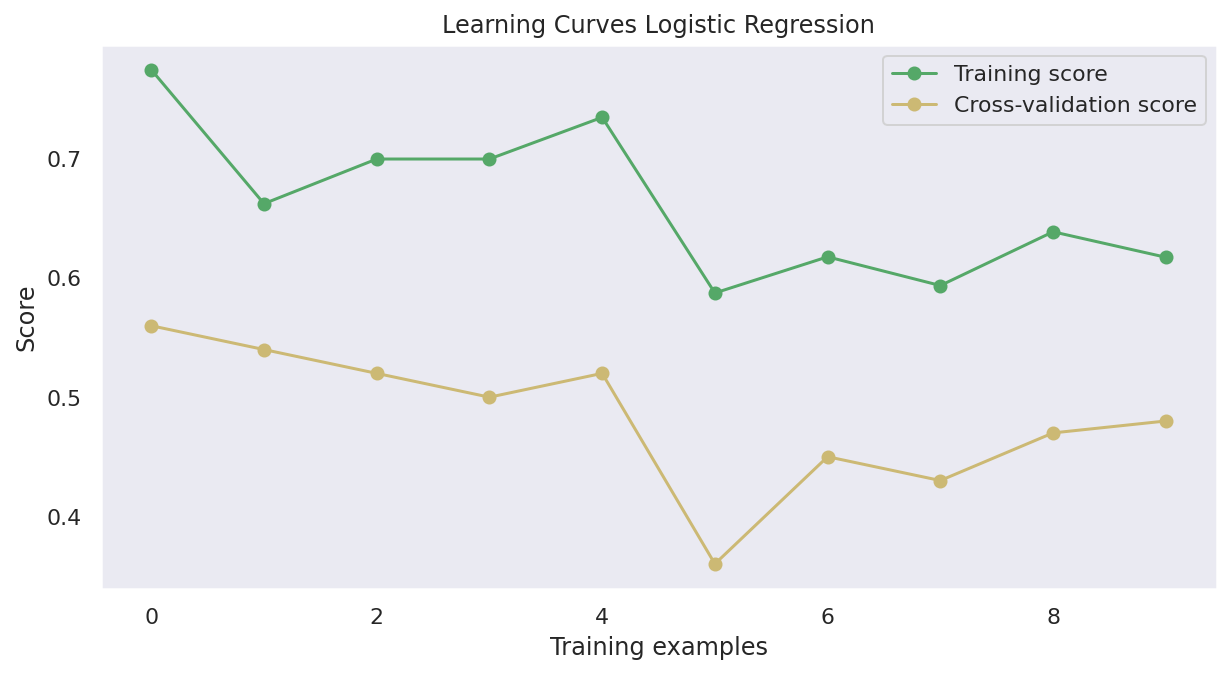

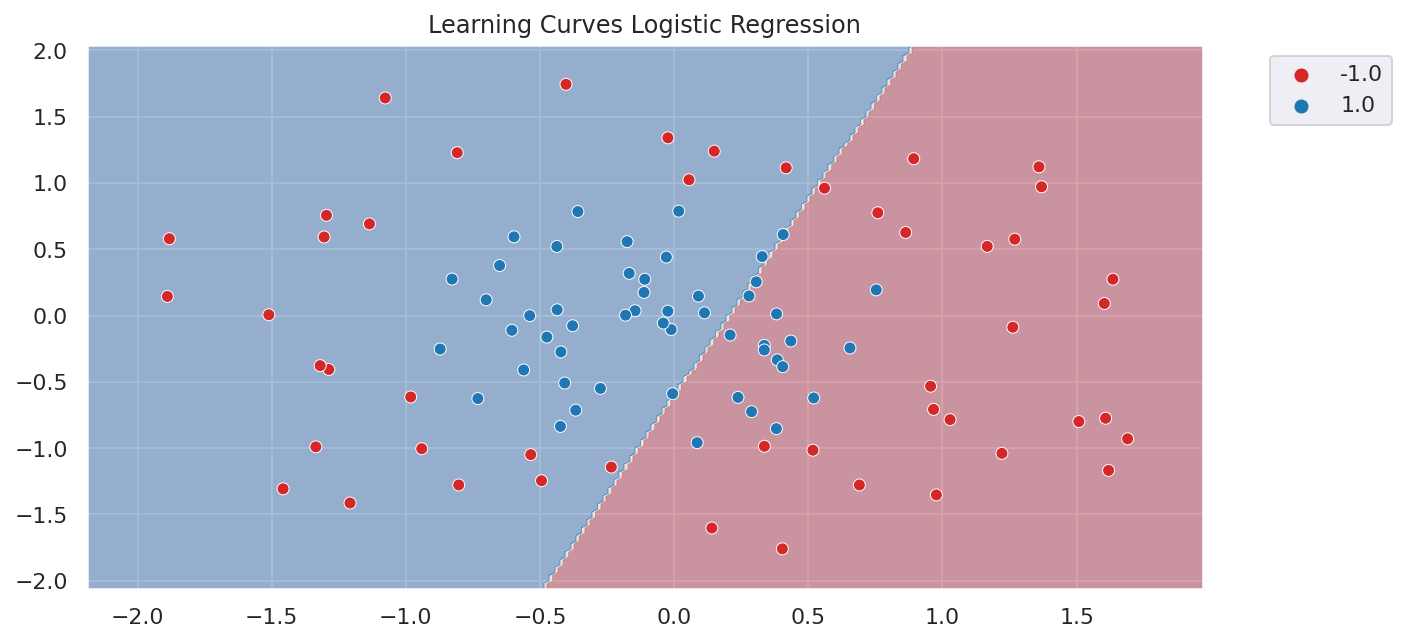

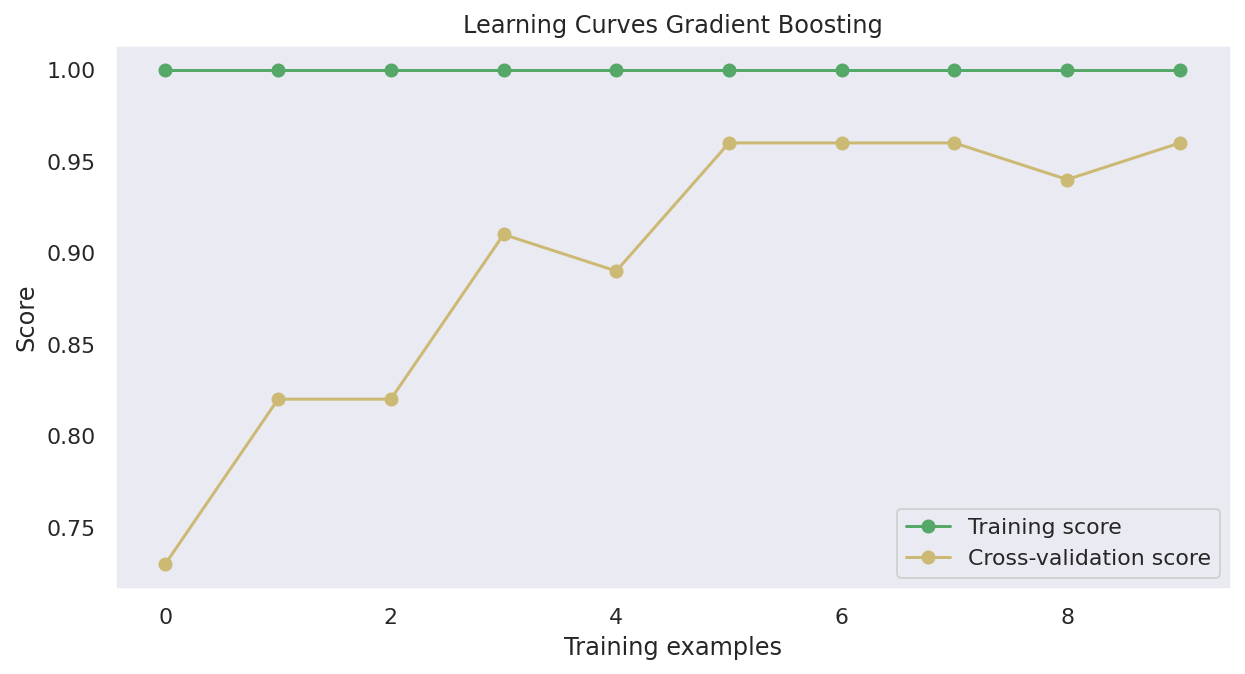

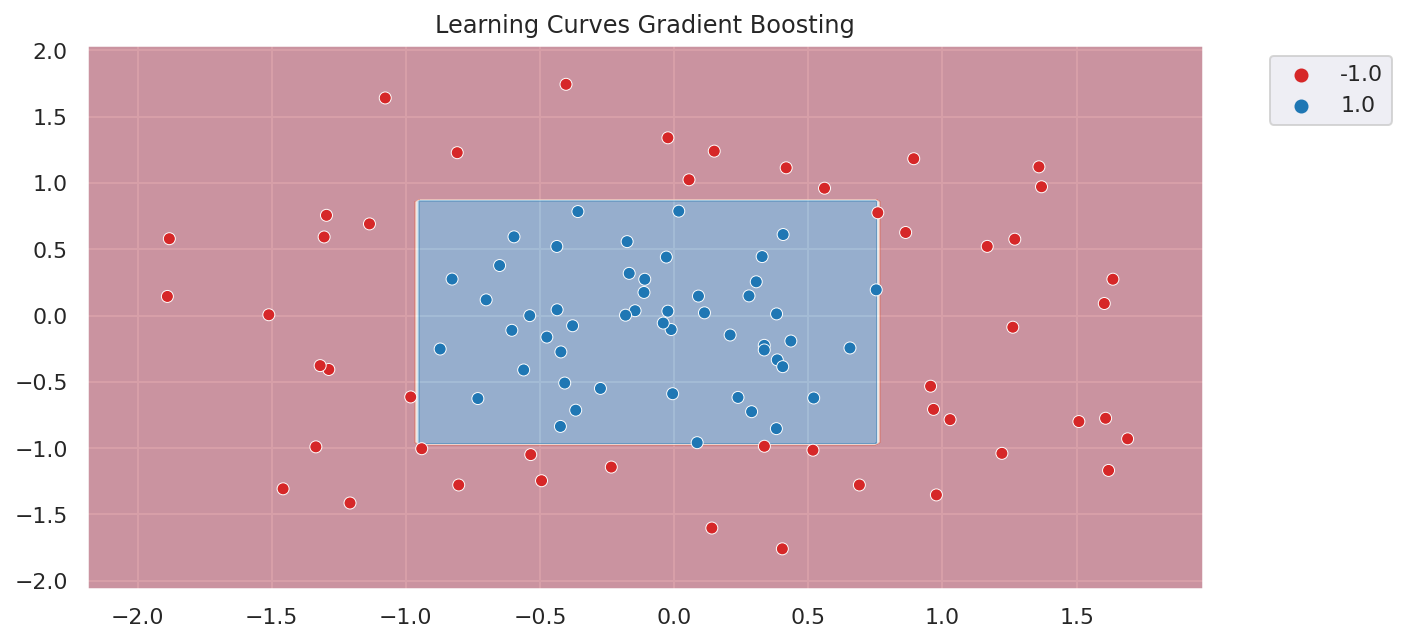

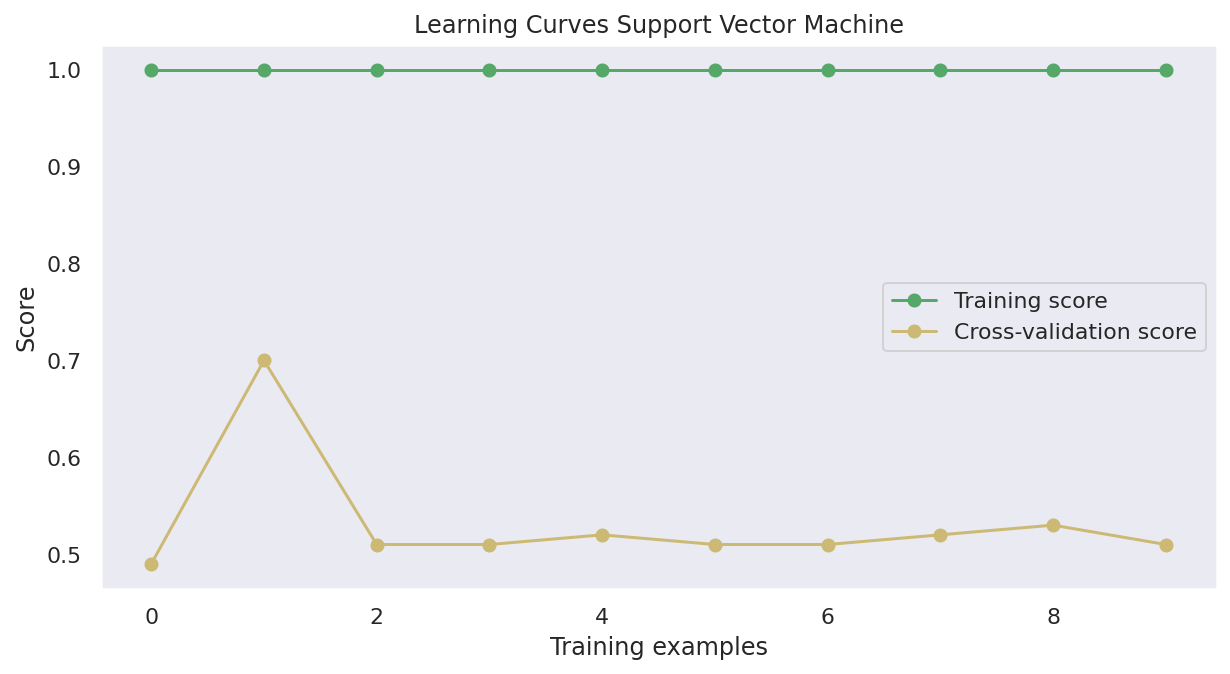

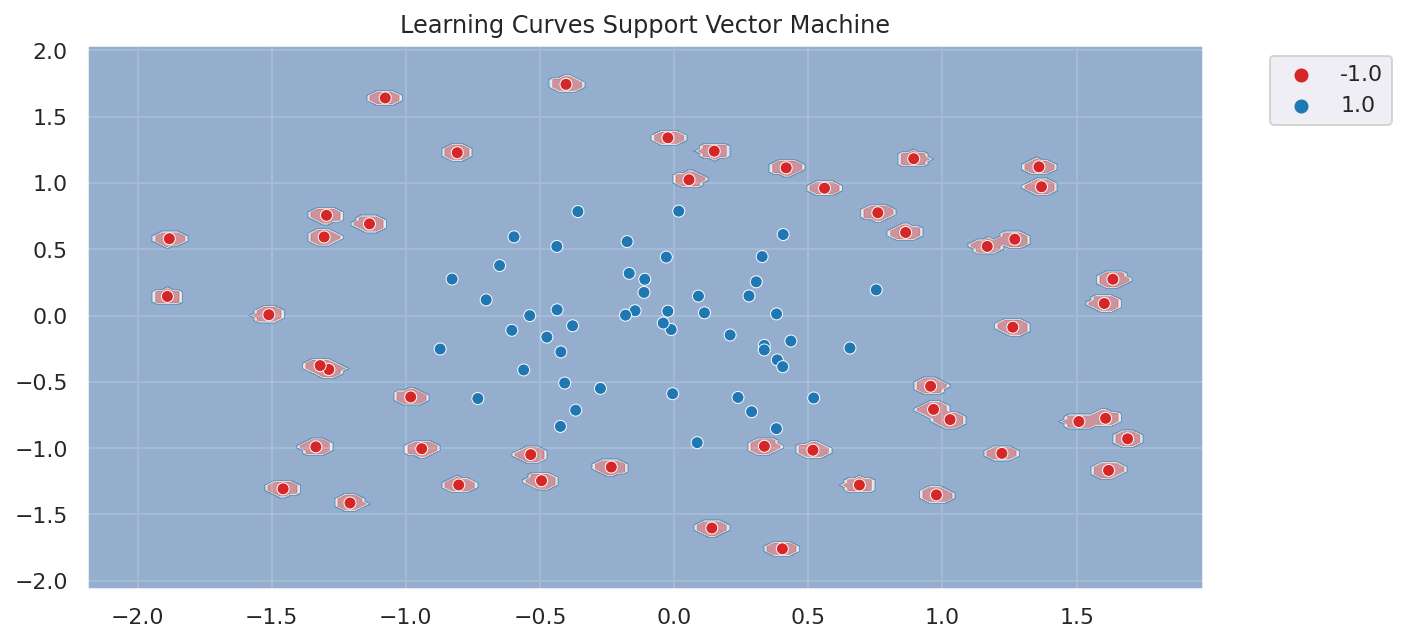

In [2]:
# Import, read, and split data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
data = pd.read_csv('data.csv')

import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
model_name = 'Logistic Regression'
estimator_LR = LogisticRegression()
draw_learning_curves(X, y, estimator_LR, 10, model_name=model_name)
plot_classification(estimator_LR, X, y, model_name=model_name)

### Decision Tree
model_name='Gradient Boosting'
estimator_GBC = GradientBoostingClassifier()
draw_learning_curves(X, y, estimator_GBC, 10, model_name=model_name)
plot_classification(estimator_GBC, X, y, model_name=model_name)

### Support Vector Machine
model_name='Support Vector Machine'
estimator_SVC = SVC(kernel='rbf', gamma=1000)
draw_learning_curves(X, y, estimator_SVC, 10, model_name=model_name)
plot_classification(estimator_SVC, X, y, model_name=model_name)